In [1]:
import json
import pandas as pd
import numpy as np
import os
import sys

In [2]:
import matplotlib.pyplot as plt

## Participant experiments

In [128]:
with open("experiments/part_test_5_v3.json", "r") as file:
    part_exp = json.load(file)

In [129]:
for key in part_exp:
    part_exp[key]['test'] = key

In [130]:
exp_list = []
for k in part_exp:
    exp_list.append(part_exp[k])

In [131]:
df = pd.DataFrame(exp_list)

In [132]:
overall = {
    "Accuracy": 0.91,	
    "Precision (Micro)": 0.91,	
    "Precision (Macro)": 0.91,	
    "Recall (Micro)": 0.91,	
    "Recall (Macro)": 0.91,	
    "F1 (Micro)": 0.90,	
    "F1 (Macro)": 0.90,
    "test": "Overall"
}

In [133]:
df

,Accuracy,Precision (Micro),Precision (Macro),Recall (Micro),Recall (Macro),F1 (Micro),F1 (Macro),test
0,0.711485,0.711485,0.727816,0.711485,0.711485,0.711485,0.706535,1 2 3 4 5
1,0.659384,0.659384,0.692011,0.659384,0.659384,0.659384,0.653924,2 3 4 5 6
2,0.703081,0.703081,0.740573,0.703081,0.703081,0.703081,0.702342,3 4 5 6 7
3,0.765266,0.765266,0.774937,0.765266,0.765266,0.765266,0.760153,4 5 6 7 8
4,0.766947,0.766947,0.776965,0.766947,0.766947,0.766947,0.762283,5 6 7 8 9
5,0.781513,0.781513,0.786068,0.781513,0.781513,0.781513,0.775708,6 7 8 9 10
6,0.802801,0.802801,0.806106,0.802801,0.802801,0.802801,0.796379,7 8 9 10 11
7,0.788235,0.788235,0.788134,0.788235,0.788235,0.788235,0.781518,8 9 10 11 12
8,0.761905,0.761905,0.767192,0.761905,0.761905,0.761905,0.755498,9 10 11 12 13
9,0.770308,0.770308,0.771977,0.770308,0.770308,0.770308,0.767872,10 11 12 13 14


In [134]:
df[df["test"].str.contains("^1 | 1 ")]

,Accuracy,Precision (Micro),Precision (Macro),Recall (Micro),Recall (Macro),F1 (Micro),F1 (Macro),test
0,0.711485,0.711485,0.727816,0.711485,0.711485,0.711485,0.706535,1 2 3 4 5


In [135]:
df[df["test"].str.contains("^25 | 25 |25$")].mean(numeric_only=True)

Accuracy             0.747227
Precision (Micro)    0.747227
Precision (Macro)    0.754580
Recall (Micro)       0.747227
Recall (Macro)       0.747227
F1 (Micro)           0.747227
F1 (Macro)           0.742234
dtype: float64

In [136]:
ind_scores = {}
for i in range(1,44):
    pattern = f"^{i} | {i} |{i}$"
    
    sl = df[df["test"].str.contains(pattern)]
    
    averaged_dict = dict(sl.mean(numeric_only=True))
    
    ind_scores[i] = averaged_dict

In [137]:
scores = pd.DataFrame(ind_scores).T

In [138]:
scores.loc[len(scores)+1] = overall

In [139]:
scores

,Accuracy,Precision (Micro),Precision (Macro),Recall (Micro),Recall (Macro),F1 (Micro),F1 (Macro)
1,0.753165,0.753165,0.764383,0.753165,0.753165,0.753165,0.749844
2,0.733333,0.733333,0.748039,0.733333,0.733333,0.733333,0.730065
3,0.725570,0.725570,0.747818,0.725570,0.725570,0.725570,0.722662
4,0.724210,0.724210,0.742102,0.724210,0.724210,0.724210,0.721236
5,0.730322,0.730322,0.747908,0.730322,0.730322,0.730322,0.727357
6,0.746078,0.746078,0.764076,0.746078,0.746078,0.746078,0.743646
7,0.765126,0.765126,0.777459,0.765126,0.765126,0.765126,0.761289
8,0.774720,0.774720,0.781442,0.774720,0.774720,0.774720,0.770096
9,0.772549,0.772549,0.777835,0.772549,0.772549,0.772549,0.767631
10,0.780952,0.780952,0.783895,0.780952,0.780952,0.780952,0.775395


In [140]:
scores

,Accuracy,Precision (Micro),Precision (Macro),Recall (Micro),Recall (Macro),F1 (Micro),F1 (Macro)
1,0.753165,0.753165,0.764383,0.753165,0.753165,0.753165,0.749844
2,0.733333,0.733333,0.748039,0.733333,0.733333,0.733333,0.730065
3,0.725570,0.725570,0.747818,0.725570,0.725570,0.725570,0.722662
4,0.724210,0.724210,0.742102,0.724210,0.724210,0.724210,0.721236
5,0.730322,0.730322,0.747908,0.730322,0.730322,0.730322,0.727357
6,0.746078,0.746078,0.764076,0.746078,0.746078,0.746078,0.743646
7,0.765126,0.765126,0.777459,0.765126,0.765126,0.765126,0.761289
8,0.774720,0.774720,0.781442,0.774720,0.774720,0.774720,0.770096
9,0.772549,0.772549,0.777835,0.772549,0.772549,0.772549,0.767631
10,0.780952,0.780952,0.783895,0.780952,0.780952,0.780952,0.775395


In [141]:
def get_name(x, max_len):

    if x.name < max_len:
        return str(x.name)
    else:
        return "overall"
    

In [142]:
scores['label'] = scores.apply(lambda x: get_name(x, 44), axis = 1)

88


Text(0.5, 1.0, 'Variability in participant performance')

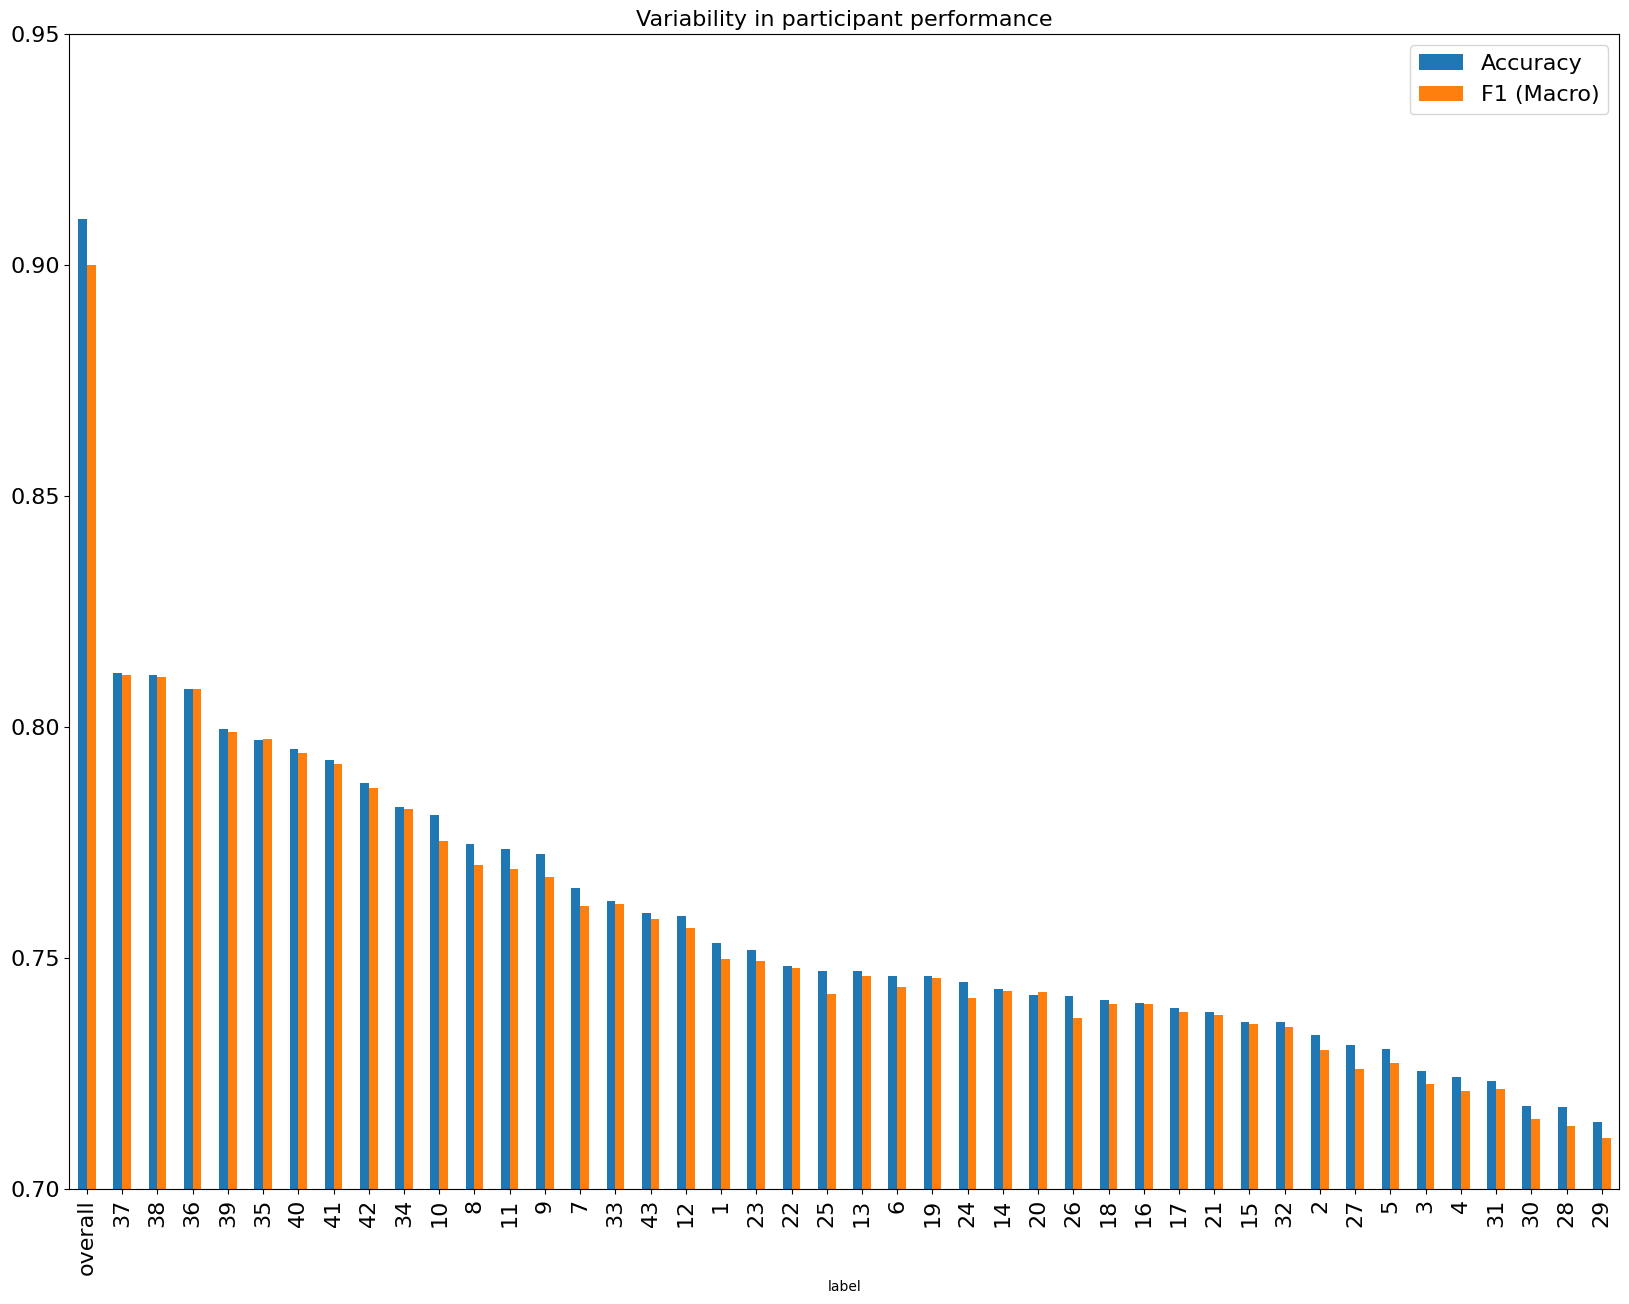

In [143]:

ax = scores.sort_values(by = "Accuracy", ascending=False).plot.bar(x = 'label', y = ["Accuracy", "F1 (Macro)"], figsize = (20,15))
bar_to_color = 'overall'
# ax.patches[0].set_color("green")
# ax.patches[43].set_color("green")

# for bar in ax.patches:
#     if bar.get_height() == df.loc[bar.get_x(), 'Accuracy']:
#         bar.set_color(color)
#     print(bar)
print(len(ax.patches))

plt.ylim([0.7,0.95])
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Variability in participant performance", fontsize=16)

## Sessions

In [144]:
with open("experiments/session_test.json", "r") as file:
    part_exp = json.load(file)

In [145]:
for key in part_exp:
    part_exp[key]['test'] = key

In [146]:
exp_list = []
for k in part_exp:
    exp_list.append(part_exp[k])

In [147]:
df = pd.DataFrame(exp_list)

In [148]:
df

,Accuracy,Precision (Micro),Precision (Macro),Recall (Micro),Recall (Macro),F1 (Micro),F1 (Macro),test
0,0.762752,0.762752,0.760436,0.762752,0.762752,0.762752,0.757883,1
1,0.801251,0.801251,0.804073,0.801251,0.801251,0.801251,0.799103,2
2,0.832714,0.832714,0.834891,0.832714,0.832714,0.832714,0.832007,3


In [149]:
ind_scores = {}
for i in range(1,4):
    pattern = f"^{i} | {i} |{i}$"
    
    sl = df[df["test"].str.contains(pattern)]
    
    averaged_dict = dict(sl.mean(numeric_only=True))
    
    ind_scores[i] = averaged_dict

In [150]:
scores = pd.DataFrame(ind_scores).T

In [151]:
scores

,Accuracy,Precision (Micro),Precision (Macro),Recall (Micro),Recall (Macro),F1 (Micro),F1 (Macro)
1,0.762752,0.762752,0.760436,0.762752,0.762752,0.762752,0.757883
2,0.801251,0.801251,0.804073,0.801251,0.801251,0.801251,0.799103
3,0.832714,0.832714,0.834891,0.832714,0.832714,0.832714,0.832007


In [152]:
scores.loc[len(scores)+1] = overall

In [153]:
scores

,Accuracy,Precision (Micro),Precision (Macro),Recall (Micro),Recall (Macro),F1 (Micro),F1 (Macro)
1,0.762752,0.762752,0.760436,0.762752,0.762752,0.762752,0.757883
2,0.801251,0.801251,0.804073,0.801251,0.801251,0.801251,0.799103
3,0.832714,0.832714,0.834891,0.832714,0.832714,0.832714,0.832007
4,0.910000,0.910000,0.910000,0.910000,0.910000,0.900000,0.900000


In [154]:
scores['label'] = scores.apply(lambda x: get_name(x, 4), axis = 1)

Text(0.5, 1.0, 'Variability in participant performance')

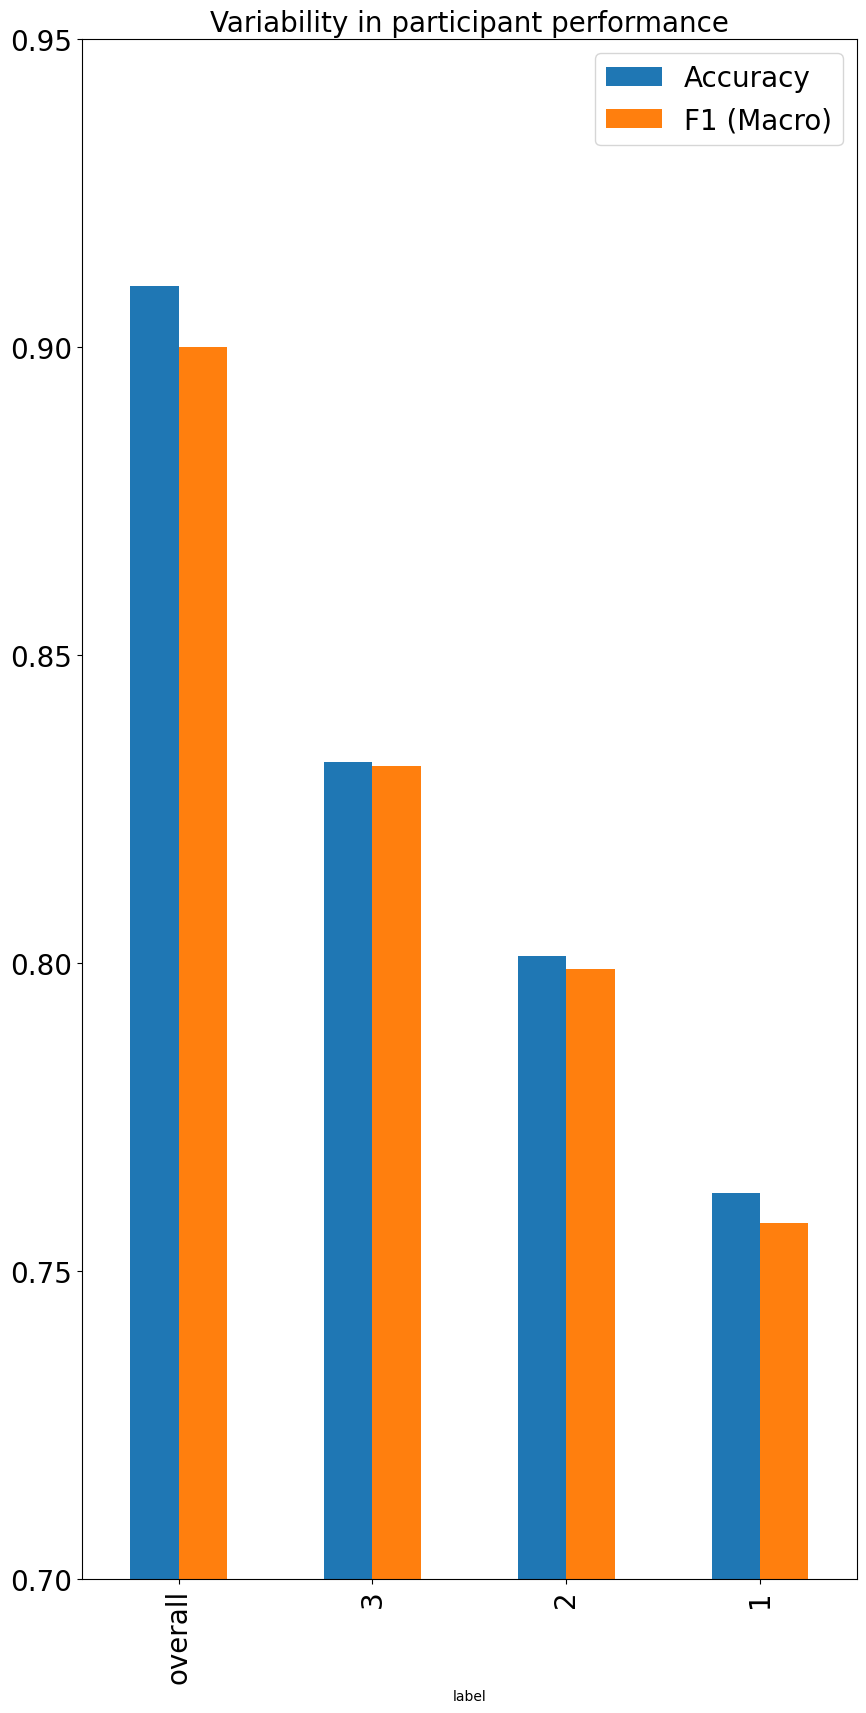

In [160]:

scores.sort_values(by = "Accuracy", ascending=False).plot.bar(x= "label", y = ["Accuracy", "F1 (Macro)"], figsize = (10,20))
plt.ylim([0.7,0.95])
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Variability in participant performance", fontsize=20)